<a href="https://colab.research.google.com/github/yatoxlee/PyTorch-for-Deep-Learning-Machine-Learning/blob/main/Exercise_for_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch as tc
from torch import nn
import numpy
import matplotlib.pyplot as plt


In [ ]:
# device agnostic
device = "cuda" if tc.cuda.is_available() == True else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
weight = 0.3
bias = 0.9

start = 0
end = 100
step = 1
"""
# 这里有个2个trick
第一个时arange中强调了dtype = tc.float32，因为arange自己创建的步长为1的range可能是int64类型的，而pytorch的默认类型是float32.
第二个是在创建数据集的时候加了一个unsqueeze，给X加了一个维度，让它能够与nn.Linear中的weight相乘。

"""
X = tc.arange(0,100,1,dtype=tc.float32).unsqueeze(dim=1)
Y = weight * X + bias

# 输出前十个以供查验
# print(f"the type of X is {X.dtype}")
# print(f"the type of Y is {Y.dtype}")

X[:10],Y[:10]

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.],
         [9.]]),
 tensor([[0.9000],
         [1.2000],
         [1.5000],
         [1.8000],
         [2.1000],
         [2.4000],
         [2.7000],
         [3.0000],
         [3.3000],
         [3.6000]]))

In [ ]:
"""
Split data into training and testing sets.
"""
proportion = 0.8
train_num = int(proportion * len(X))
# print(type(train_num))
Xtrain = X[:train_num]
Ytrain = Y[:train_num]
Xtest = X[train_num:]
Ytest = Y[train_num:]
print(Xtrain[::10])

tensor([[ 0.],
        [10.],
        [20.],
        [30.],
        [40.],
        [50.],
        [60.],
        [70.]])


In [ ]:
"""
Visulization function.
"""
def plot_predictions(train_data=Xtrain,
                     train_labels=Ytrain,
                     test_data=Xtest,
                     test_labels=Ytest,
                     predictions=None):
  """
  Visualize the prediction results.
  """
  plt.figure()
  plt.scatter(train_data,train_labels,c="b",s=4, label = "Train data")
  plt.scatter(test_data,test_labels,c="g",s=4, label = "Test data")

  if predictions != None:
    plt.scatter(test_data,predictions, c="r", s=4, label="Predictions")

  plt.legend()

In [ ]:
"""
Building the model.
"""
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,out_features=1)
    # self.weights = nn.Parameter(tc.randn(1,dtype=tc.float),requires_grad=True)
    # self.bias = nn.Parameter(tc.randn(1,dtype=tc.float),requires_grad=True)

  def forward(self, x: tc.tensor) -> tc.tensor:
    return self.linear_layer(x)
    # return self.weights * x + self.bias


tc.manual_seed(42)
model0 = LinearRegressionModel()
model0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


Number of testing samples: 20
Number of predictions made: 20
Predicted values:
tensor([[61.9931],
        [62.7576],
        [63.5222],
        [64.2867],
        [65.0512],
        [65.8158],
        [66.5803],
        [67.3449],
        [68.1094],
        [68.8739],
        [69.6385],
        [70.4030],
        [71.1676],
        [71.9321],
        [72.6966],
        [73.4612],
        [74.2257],
        [74.9902],
        [75.7548],
        [76.5193]])


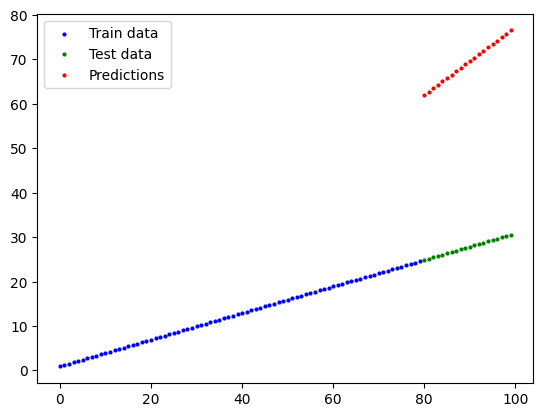

In [ ]:
"""
This part may not be available for the approach of linear_layer by nn.Linear()
"""

with tc.inference_mode():
  ypreds = model0(Xtest)

plot_predictions(predictions=ypreds)


# Check the predictions
print(f"Number of testing samples: {len(Xtest)}")
print(f"Number of predictions made: {len(ypreds)}")
print(f"Predicted values:\n{ypreds}")

In [ ]:
"""
Picking up loss function and optimizer
"""
# 选择损失函数
loss_fn = nn.L1Loss()

# 定义optimizer，需要传入需要训练模型的所有参数，以及定义一个学习率。
optimizer = tc.optim.SGD(params=model0.parameters(),lr=0.002)


In [ ]:
from os import tcgetpgrp
tc.manual_seed(42)

iterate = 2000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for i in range(iterate):

  # Training section
  model0.train()
  ypreds = model0(Xtrain)
  loss = loss_fn(Ytrain,ypreds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Prediction section
  model0.eval()
  with tc.inference_mode():
    testpreds = model0(Xtest)
    testloss = loss_fn(testpreds, Ytest.type(tc.float))

    if i % 50 == 0:
      epoch_count.append(i)
      train_loss_values.append(loss)
      test_loss_values.append(testloss)
      print(f"iterate:{i}|MAE train loss:{loss}|test loss:{testloss}")


iterate:0|MAE train loss:18.281030654907227|test loss:34.433753967285156
iterate:50|MAE train loss:0.4077382981777191|test loss:6.249197483062744
iterate:100|MAE train loss:0.3558562397956848|test loss:6.363589286804199
iterate:150|MAE train loss:0.3120749592781067|test loss:6.4598798751831055
iterate:200|MAE train loss:0.31082671880722046|test loss:6.461127281188965
iterate:250|MAE train loss:0.30957767367362976|test loss:6.462378025054932
iterate:300|MAE train loss:0.30832886695861816|test loss:6.463625907897949
iterate:350|MAE train loss:0.30708035826683044|test loss:6.464873313903809
iterate:400|MAE train loss:0.3058316111564636|test loss:6.466124534606934
iterate:450|MAE train loss:0.30458277463912964|test loss:6.467371940612793
iterate:500|MAE train loss:0.3033343255519867|test loss:6.468619346618652
iterate:550|MAE train loss:0.3020854592323303|test loss:6.469870567321777
iterate:600|MAE train loss:0.3008367121219635|test loss:6.471117973327637
iterate:650|MAE train loss:0.29958

In [ ]:
model0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2940]])),
             ('linear_layer.bias', tensor([0.8716]))])

tensor([[24.3907],
        [24.6847],
        [24.9787],
        [25.2727],
        [25.5666],
        [25.8606],
        [26.1546],
        [26.4486],
        [26.7426],
        [27.0366],
        [27.3306],
        [27.6246],
        [27.9186],
        [28.2125],
        [28.5065],
        [28.8005],
        [29.0945],
        [29.3885],
        [29.6825],
        [29.9765]])


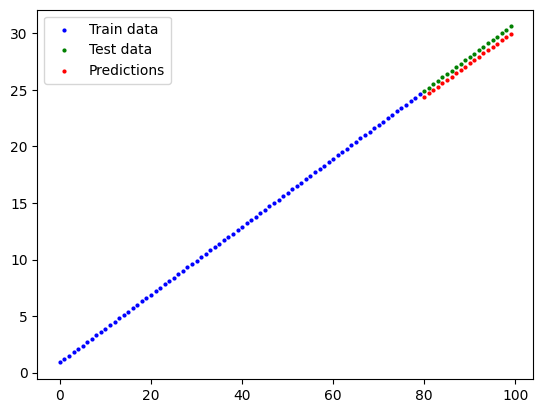

In [ ]:
"""
Making predictions with a trained Pytorch model.
"""
with tc.inference_mode():
  ypreds = model0(Xtest)
print(ypreds)
plot_predictions(predictions=ypreds)

In [ ]:
"""
Saving the trained model.
"""

from pathlib import Path

# 1.Create Directory
Model_Path = Path("model")
Model_Path.mkdir(parents=True, exist_ok=True)

# 2.Create model save path
Model_Name = "Exercise_01.pth"
Model_Save_Path = Model_Path/Model_Name

# 3.Save the model state dict.
print(f"Saving model to: {Model_Save_Path}")
tc.save(obj = model0.state_dict(), f=Model_Save_Path)


Saving model to: model/Exercise_01.pth


In [ ]:
model1 = LinearRegressionModel()
model1.load_state_dict(tc.load(Model_Save_Path))

<ipython-input-13-cafa7bfc8e3c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(tc.load(Model_Save_Path))


<All keys matched successfully>

In [ ]:
with tc.inference_mode():
  ypreds_load = model1(Xtest)
  ypreds = model0(Xtest)
ypreds_load == ypreds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])